# Linear regression (October 12th, 2024)

In [ ]:
# Get data
!gdown -cq 147FUijJc2yuu5S5CEDOx46vElUDGhAhE

In [ ]:
import numpy as np

In [ ]:
# dataset
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data by using mean normalizaton


def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg


X_b, maxi, mini, avg = mean_normalization(X)

In [ ]:
X_b.shape

(200, 4)

## Vectorization for linear regression

### Implement function `stochastic_gradient_descent`

In [ ]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],
                        [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) #In real application, you should use this code
            random_index = i  # This code is used for this assignment only

            xi = X_b[random_index: random_index + 1]
            yi = y[random_index: random_index + 1]

            # Compute output
            # ******* Your code here ********
            y_hat = xi.dot(thetas)

            # Compute loss li
            # ******* Your code here ********
            loss_i = (1/2 * (y_hat - yi)**2)[0][0]

            # Compute gradient for loss
            # ******* Your code here ********

            # Compute gradient
            # ******* Your code here ********
            gradient = xi.T.dot(y_hat - yi)

            # update theta
            # ******* Your code here ********
            thetas = thetas - learning_rate * gradient

            # logging
            # ******* Your code here ********
            thetas_path.append(thetas)
            losses.append(loss_i)

    return thetas_path, losses

In [ ]:
import matplotlib.pyplot as plt

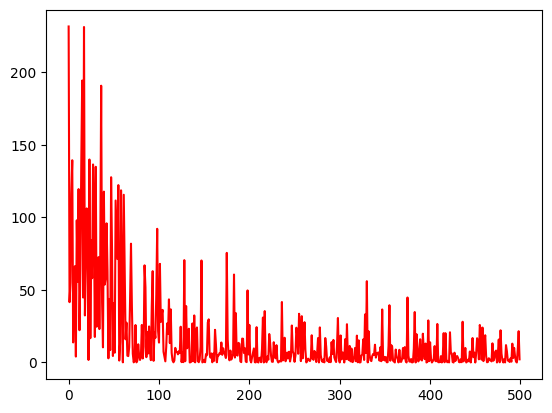

In [ ]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50,
                                                learning_rate=0.01)

x_axis = list(range(500))
plt.plot(x_axis, losses[:500], color="r")
plt.show()

In [ ]:
sgd_theta, losses = stochastic_gradient_descent(
    X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


### Implement function `mini_batch_gradient_descent`

In [ ]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033],
                         [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code forreal application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3,
                                       132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
                                       185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
                                       165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
                                       169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
                                       77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
                                       195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
                                       92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
                                       174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
                                       129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
                                       168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
                                       133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
                                       154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size]

            # compute output
            # ******* Your code here ********
            y_hat = xi.dot(thetas)

            # compute loss
            # ******* Your code here ********
            loss = 1/2 * (y_hat - yi)**2

            # compute derivative of loss
            # ******* Your code here ********
            loss_gradient = y_hat - yi

            # compute derivative of parameters
            # ******* Your code here ********
            gradients = xi.T.dot(loss_gradient) / xi.shape[0]

            # update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

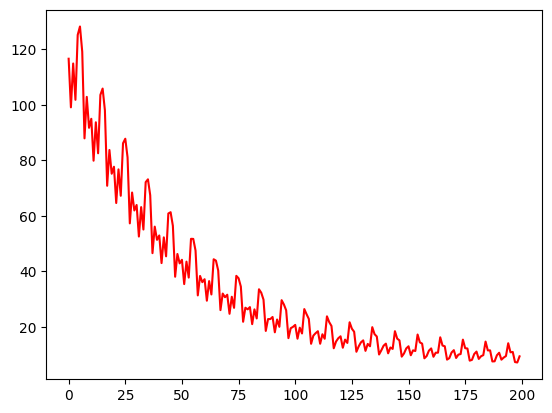

In [ ]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,
                                                  minibatch_size=20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [ ]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,
                                                  minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


### Implement function `batch_gradient_descent`

In [ ]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],
                        [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # compute output
        # ******* Your code here ********
        y_hat = X_b.dot(thetas)

        # Compute loss
        # ******* Your code here ********
        loss = (y_hat - y)**2

        # Compute losss's derivative
        # ******* Your code here ********
        loss_gradient = 2*(y_hat - y)/N

        # computer parameters'derivative
        # ******* Your code here ********
        gradients = X_b.T.dot(loss_gradient)

        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)

    return thetas_path, losses

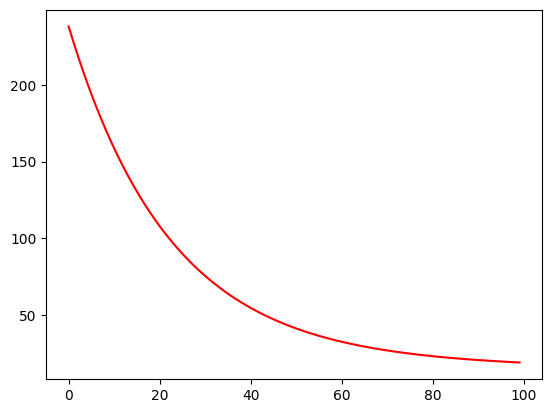

In [ ]:
bgd_thetas, losses = batch_gradient_descent(
    X_b, y, n_epochs=100, learning_rate=0.01)

x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()

In [ ]:
bgd_thetas, losses = batch_gradient_descent(
    X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses), 2))

6716.46


## Bitcoin price forecasting

### Get the dataset

In [ ]:
!gdown -cq 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

### Read the dataset

In [ ]:
# Load dataset
import pandas as pd

df = pd.read_csv('./BTC-Daily.csv')

# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        2651 non-null   int64         
 1   date        2651 non-null   datetime64[ns]
 2   symbol      2651 non-null   object        
 3   open        2651 non-null   float64       
 4   high        2651 non-null   float64       
 5   low         2651 non-null   float64       
 6   close       2651 non-null   float64       
 7   Volume BTC  2651 non-null   float64       
 8   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 186.5+ KB


In [ ]:
df.describe()

,unix,date,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,2018-07-15 00:00:00,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
min,1.417133e+09,2014-11-28 00:00:00,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,2016-09-20 12:00:00,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,2018-07-15 00:00:00,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,2020-05-07 12:00:00,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,2022-03-01 00:00:00,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09
std,6.613247e+07,NaN,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08


In [ ]:
# Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + \
    str(df['date'].dt.date.max())
print(date_range)

2014-11-28 to 2022-03-01


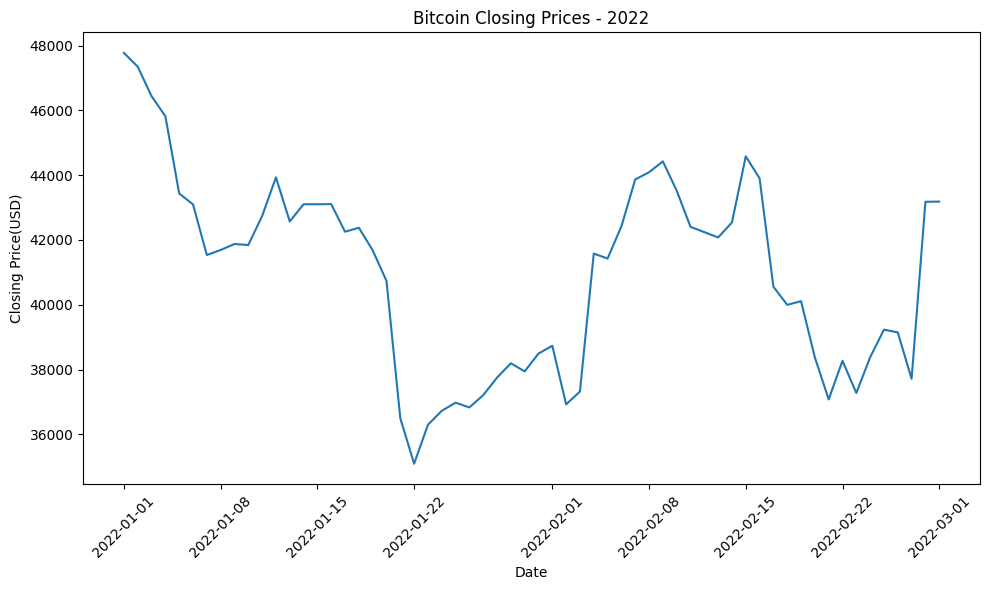

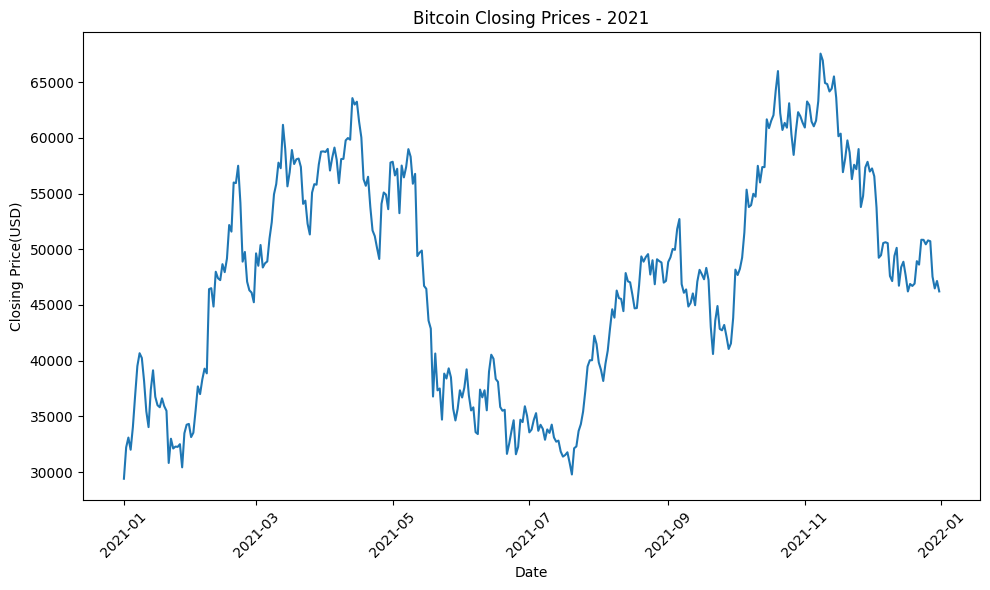

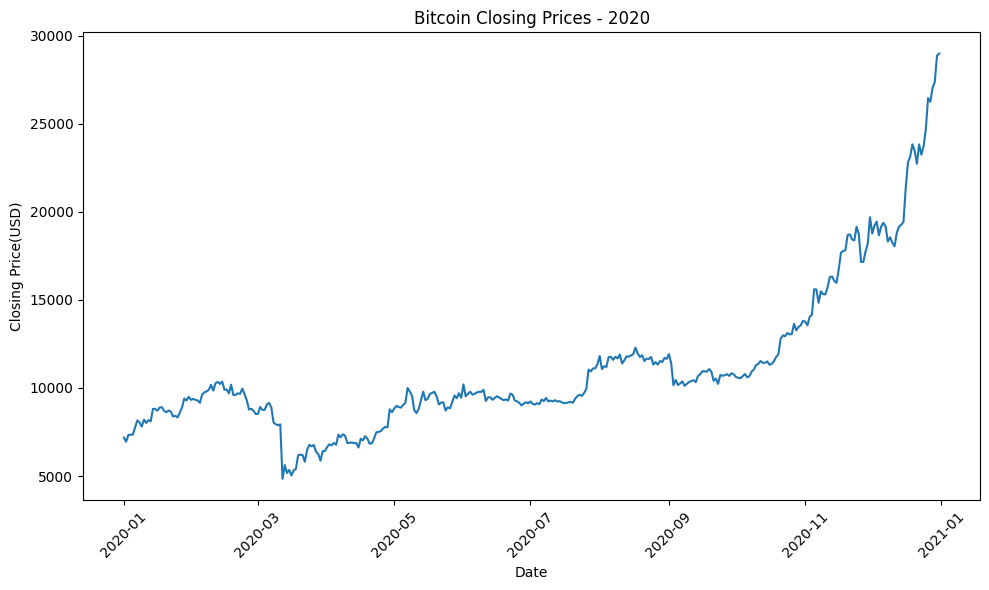

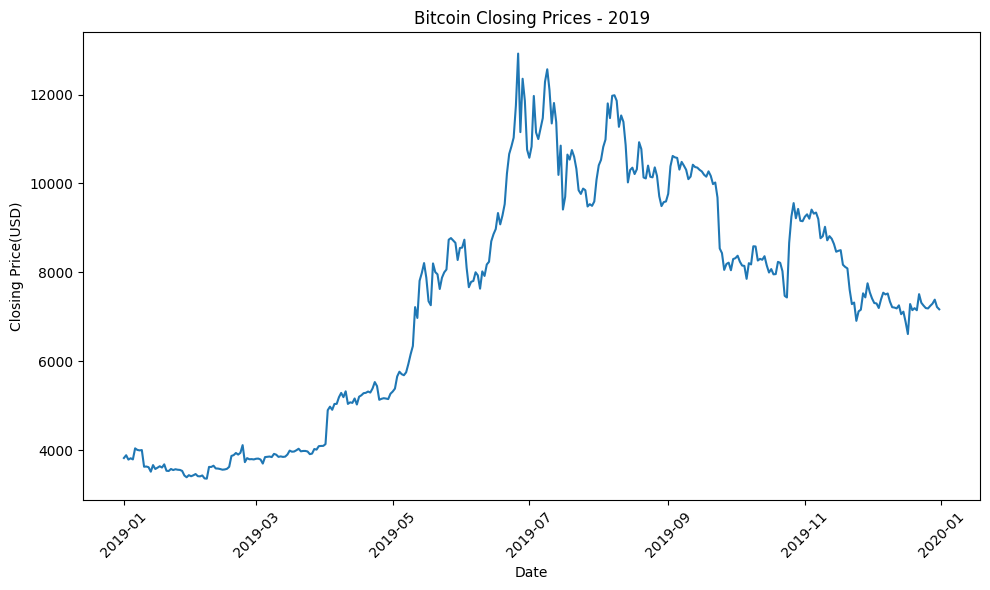

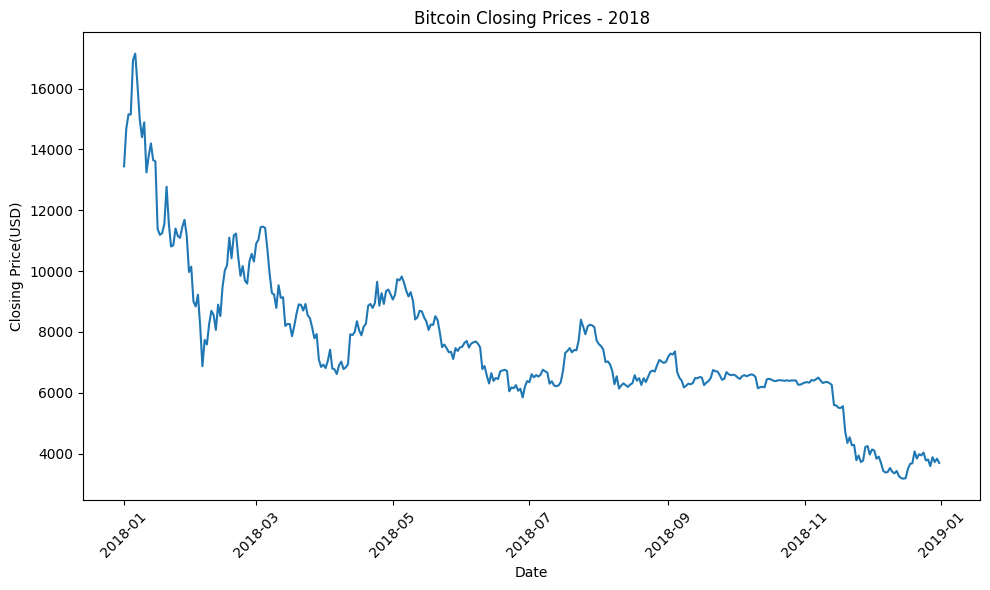

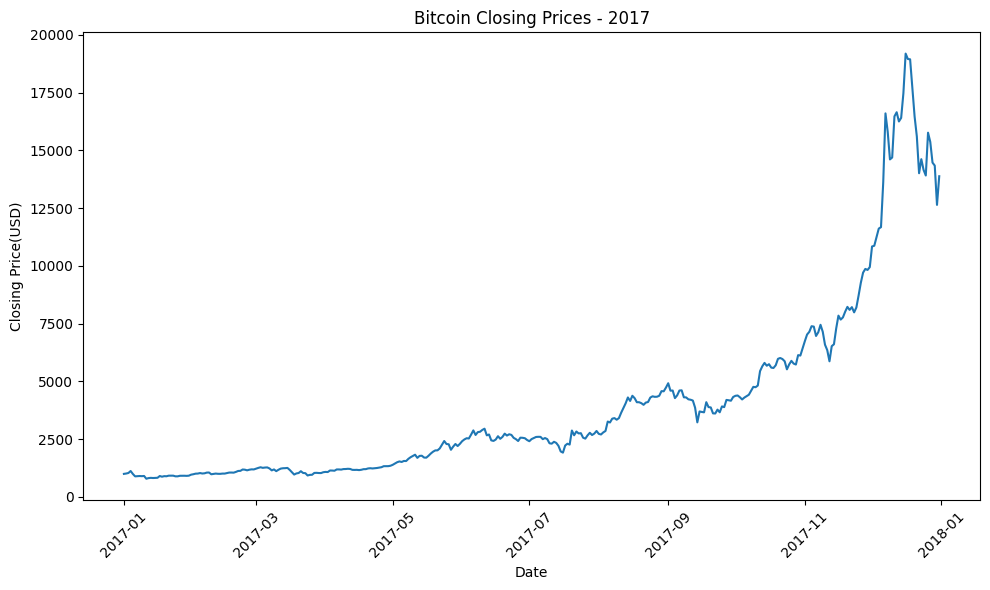

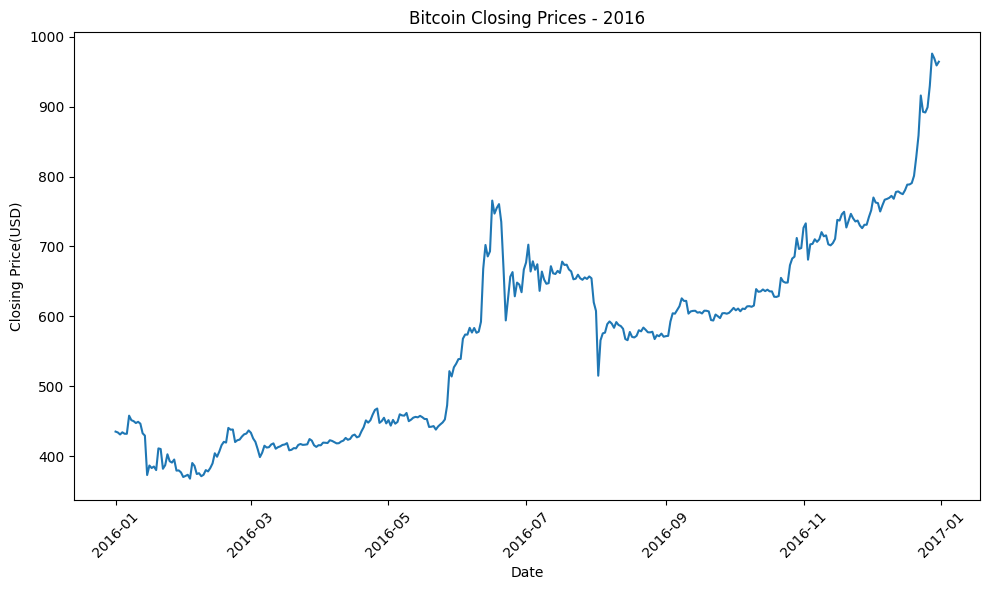

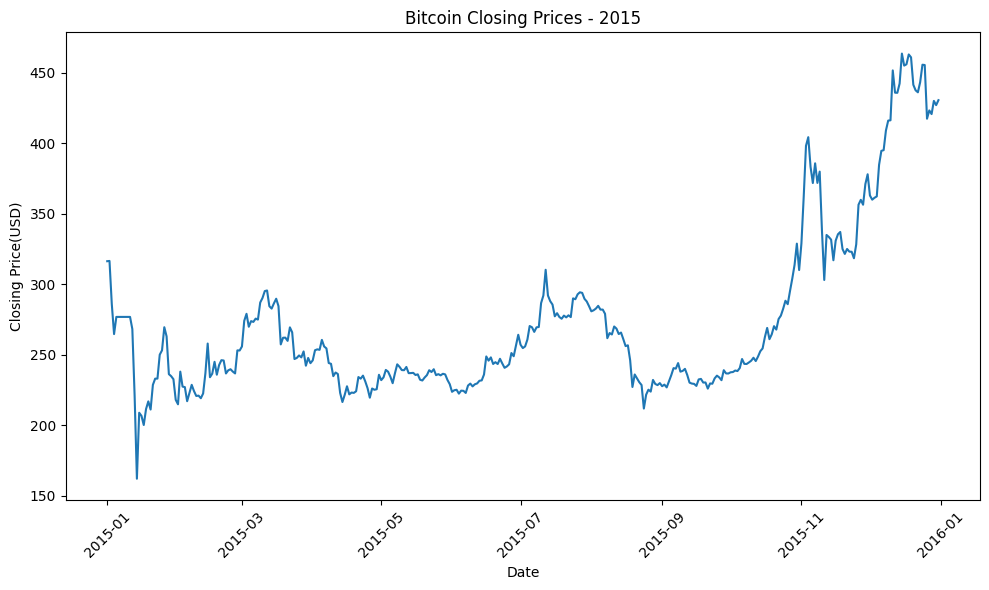

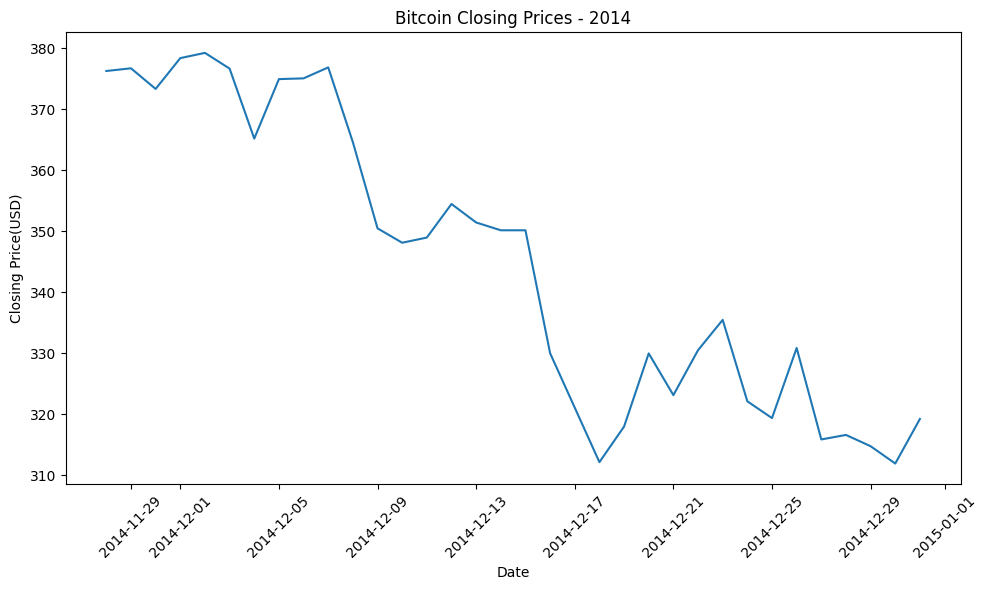

In [ ]:
# ####### Your code here ########
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
unique_years = df['year'].unique()

for year in unique_years:
    ####### Your code here ########
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day

    merged_data = pd.merge(year_month_day, df, on=[
                           'year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price(USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df.date

0      2022-03-01
1      2022-02-28
2      2022-02-27
3      2022-02-26
4      2022-02-25
          ...    
2646   2014-12-02
2647   2014-12-01
2648   2014-11-30
2649   2014-11-29
2650   2014-11-28
Name: date, Length: 2651, dtype: datetime64[ns]

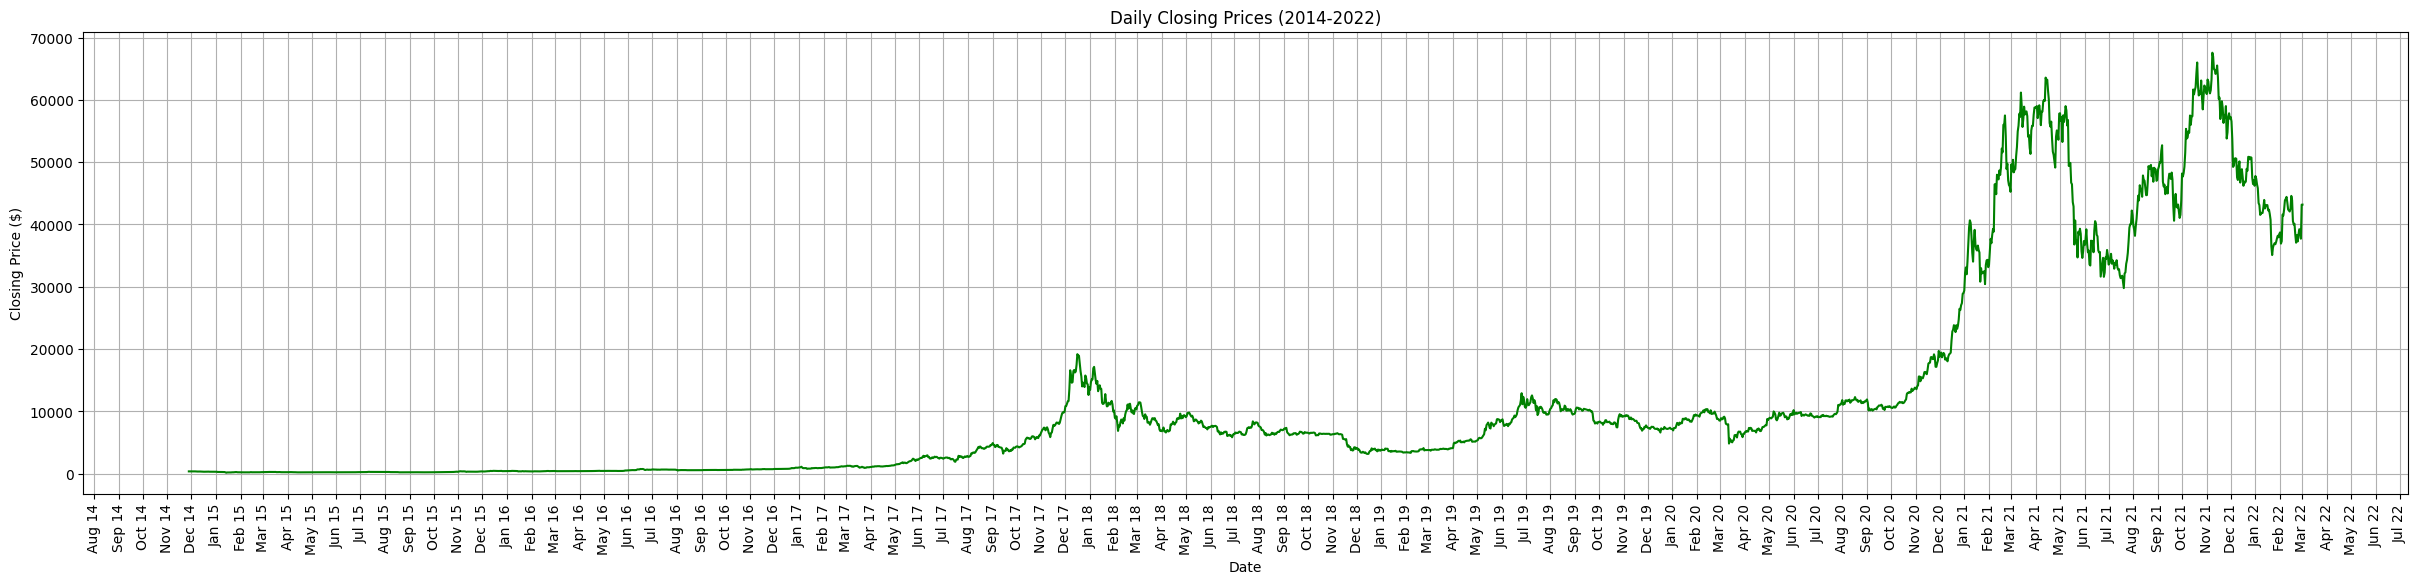

In [ ]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(30, 6))
plt.plot(df['date'], df['close'], linestyle='-', color='g')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
plt.title('Daily Closing Prices (2014-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
!pip install mplfinance

C:\Users\DELL\AppData\Local\Temp\ipykernel_39156\47327841.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


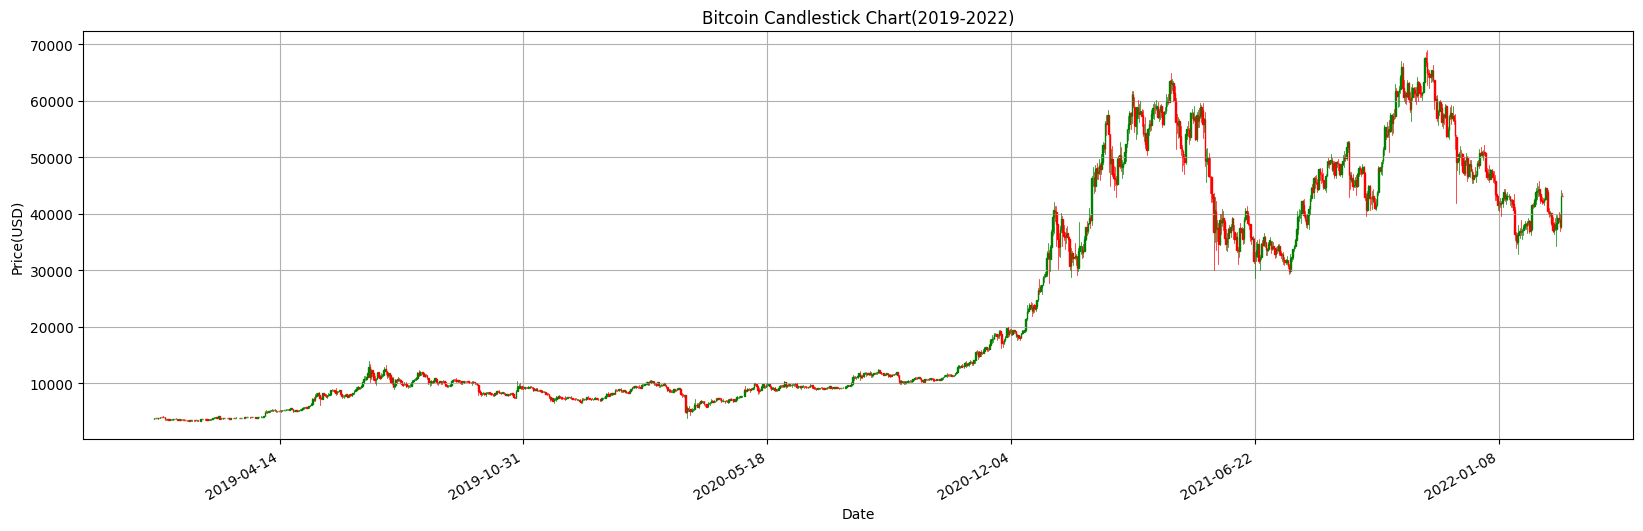

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019 -2022
df_filtered = df[(df['date'] >= '2019-01-01') &
                 (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low',
                 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart(2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)

# Save the plot as a PDF
# plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()

### Preprocess abnd split the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scalar = StandardScaler()

## Your Code here ##
df["Standardized_Close_Prices"] = scalar.fit_transform(
    df["close"].values.reshape(-1, 1))
df["Standardized_Open_Prices"] = scalar.fit_transform(
    df["open"].values.reshape(-1, 1))
df["Standardized_High_Prices"] = scalar.fit_transform(
    df["high"].values.reshape(-1, 1))
df["Standardized_Low_Prices"] = scalar.fit_transform(
    df["low"].values.reshape(-1, 1))

X = df[["Standardized_Open_Prices",
       
        "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, shuffle=True)

### Initialize the Linear Regression model

In [ ]:
def predict(X, w, b):
    # ##### Your code here #####
    return X.dot(w) + b


def gradient(y_hat, y, x):
    # ##### Your code here #####
    loss = y_hat-y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw, db, cost)


def update_weight(w, b, lr, dw, db):
    # ##### Your code here #####
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)

### Train the Linear Regression model

In [ ]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200) :
    n_samples, n_features = X.shape
    w = np.zeros(n_features) # Initialize weights
    b = 0 # Initialize bias
    losses = []

    # ##### Your code here #####

    return w, b, losses

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values,
learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

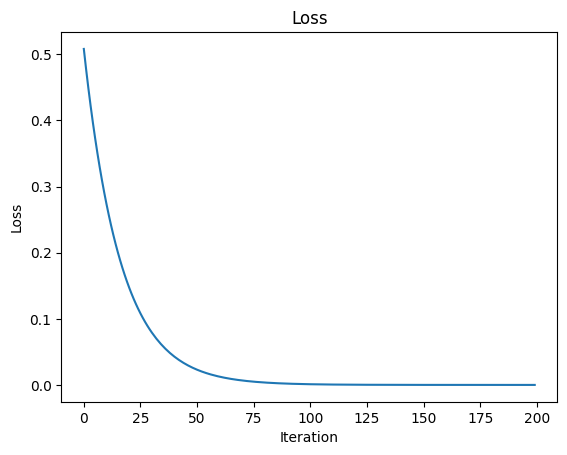

In [ ]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Initialize weights
    b = 0  # Initialize bias
    losses = []

    # ##### Your code here #####
    for _ in range(num_iterations):
        y_hat = predict(X, w, b)
        dw, db, cost = gradient(y_hat, y, X)
        w, b = update_weight(w, b, learning_rate, dw, db)
        losses.append(cost)

    return w, b, losses


w, b, losses = linear_regression_vectorized(X_train.values, y_train.values,
                                            learning_rate=0.01, num_iterations=200)

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

### Evaluate the model

In [ ]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


### Make inference

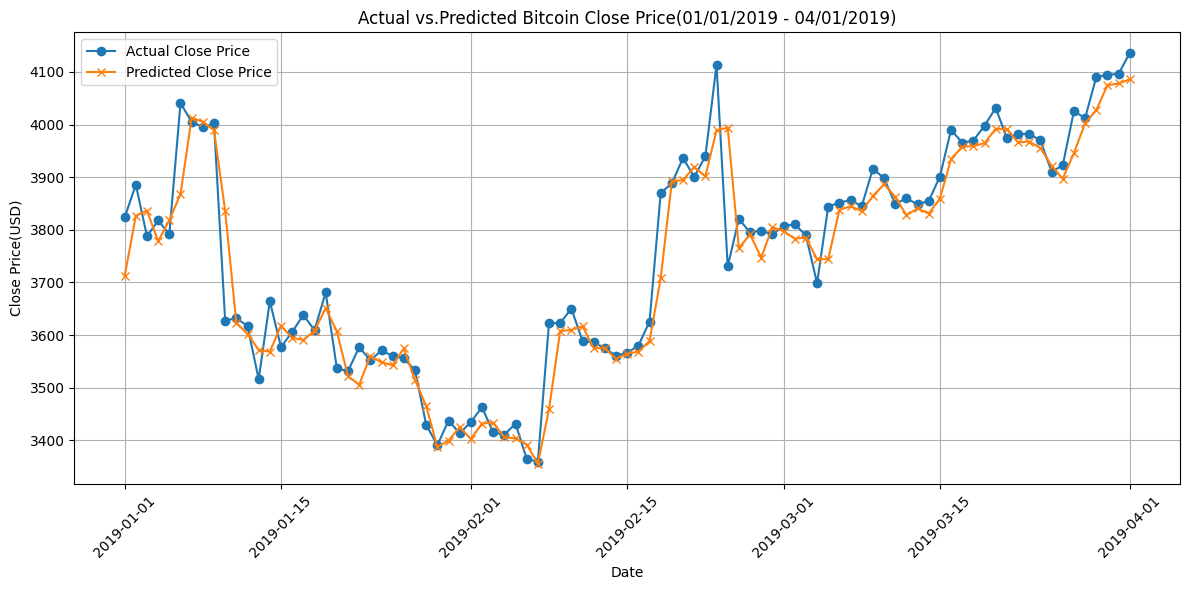

In [ ]:
# Filter data for 2019 -01 -01 to 2019 -04 -01
df_2019_q1 = df[(df['date'] >= '2019-01-01') &
                (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual,
         label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred,
         label='Predicted Close Price', marker='x')
plt.title('Actual vs.Predicted Bitcoin Close Price(01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price(USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()